In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import pandas as pd
import glob
import seaborn as sns
import sys
sys.path.append("..")
from tqdm import tqdm

plt.style.use("../config/custom_plt.mplstyle")

In [2]:
import json 

p = "/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/twitch/PTBR/musae_PTBR_features.json"

# In total 3,169 number of features
with open(p) as json_data:
    labels = json.load(json_data)

all_features = []
for idx, feature_idx in labels.items():
    features = np.zeros(3170).astype(int)
    features[feature_idx] = 1
    all_features.append(features)
    
all_features = np.array(all_features)
all_features = pd.DataFrame(all_features)
all_features.columns = [f'f{i}' for i in range(all_features.shape[1])]
all_features['new_id'] = [int(x) for x in labels.keys()]

labels = pd.read_csv("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/twitch/PTBR/musae_PTBR_target.csv")
labels['label'] = labels['mature'].astype(int)
labels = labels.merge(all_features)

labels

,id,days,mature,views,partner,new_id,label,f0,f1,f2,...,f3160,f3161,f3162,f3163,f3164,f3165,f3166,f3167,f3168,f3169
0,44891403,1943,False,929459,True,1706,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,61180621,1633,False,11194,False,1273,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,145109685,632,False,2850,False,313,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,122121521,906,True,3422,False,1570,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,189445819,267,False,71,False,800,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1907,36208929,2199,True,3870,False,699,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1908,35856620,2233,False,563412,True,109,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1909,106353597,1066,False,130221,True,769,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1910,58115154,1684,False,698715,True,504,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
categories = labels['label'].unique()
colormap = cm.get_cmap('Set1', len(categories))

/tmp/ipykernel_3594227/3370728750.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('Set1', len(categories))


In [4]:
category_to_colormap = dict(zip(categories, range(len(categories))))
category_to_colormap

{0: 0, 1: 1}

## Exploring node features

In [5]:
import networkx as nx

g = nx.read_edgelist("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/twitch/PTBR/musae_PTBR_edges.edge",
                     nodetype=int)
gcc_edges_idx = list(g.nodes)

gcc_edges_idx.sort()
gcc_edges_idx[:5]

[0, 1, 2, 3, 4]

In [6]:
data = labels
data

,id,days,mature,views,partner,new_id,label,f0,f1,f2,...,f3160,f3161,f3162,f3163,f3164,f3165,f3166,f3167,f3168,f3169
0,44891403,1943,False,929459,True,1706,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,61180621,1633,False,11194,False,1273,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,145109685,632,False,2850,False,313,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,122121521,906,True,3422,False,1570,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,189445819,267,False,71,False,800,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1907,36208929,2199,True,3870,False,699,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1908,35856620,2233,False,563412,True,109,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1909,106353597,1066,False,130221,True,769,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1910,58115154,1684,False,698715,True,504,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Dimensional reduction of the nodes' features using UMAP

In [7]:
from sklearn import preprocessing
from sklearn.utils import shuffle


X = data.drop(["id", 'days', 'mature', 'views', 'partner', 'new_id', "label"], axis=1).values

le = preprocessing.LabelEncoder()
y = le.fit_transform(data['label'].values)

X[:5], y[:5]

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 array([0, 0, 0, 1, 0]))

In [8]:
np.mean(X.sum(axis=1))

19.884414225941423

In [8]:
%%time
from sklearn.model_selection import train_test_split
from umap.umap_ import UMAP
np.random.seed(12)

reducer = UMAP(metric='cosine', random_state=61)

X_umap = reducer.fit_transform(X)
X_umap.shape

CPU times: user 27.5 s, sys: 631 ms, total: 28.1 s
Wall time: 33.2 s


(1912, 2)

Text(0.5, 1.0, 'UMAP dim=2')

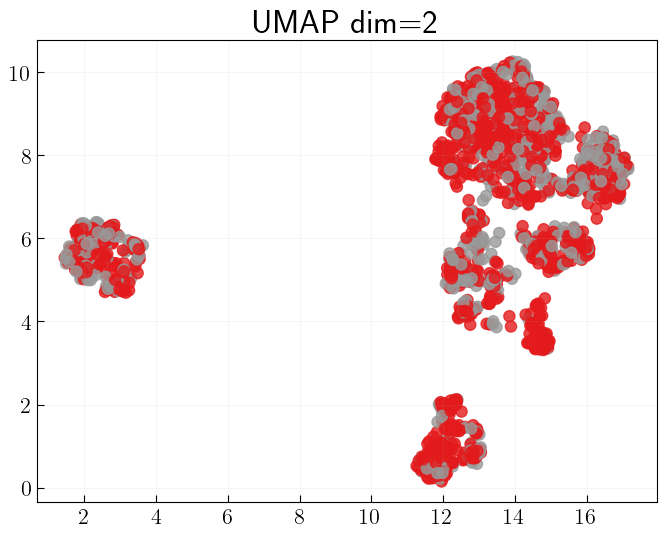

In [9]:
from matplotlib.lines import Line2D

plt.scatter(X_umap[:, 0], X_umap[:, 1], color=[colormap(i) for i in y], alpha=0.8)
plt.title('UMAP dim=2')

### Check non-euclidean embeddings

https://umap-learn.readthedocs.io/en/latest/embedding_space.html

**Spherical embeddings**

In [10]:
sphere_mapper = UMAP(metric='cosine', output_metric='haversine', random_state=61).fit(X) 

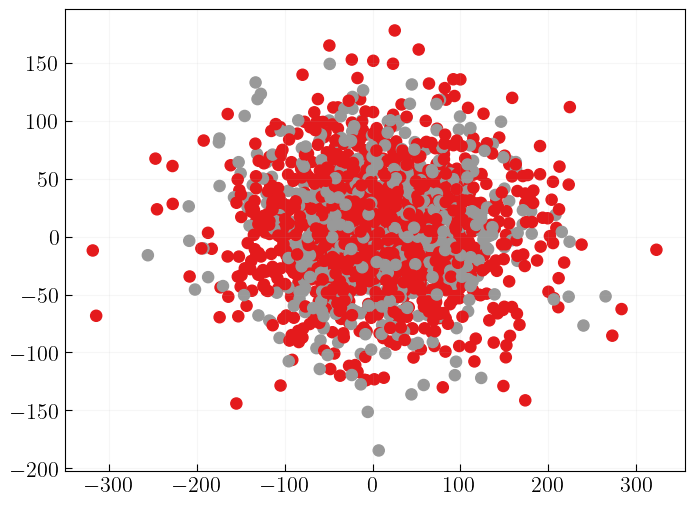

In [11]:
plt.scatter(sphere_mapper.embedding_.T[0], sphere_mapper.embedding_.T[1], c=[colormap(i) for i in y])

In [12]:
xx = np.sin(sphere_mapper.embedding_[:, 0]) * np.cos(sphere_mapper.embedding_[:, 1])
yy = np.sin(sphere_mapper.embedding_[:, 0]) * np.sin(sphere_mapper.embedding_[:, 1])
zz = np.cos(sphere_mapper.embedding_[:, 0])

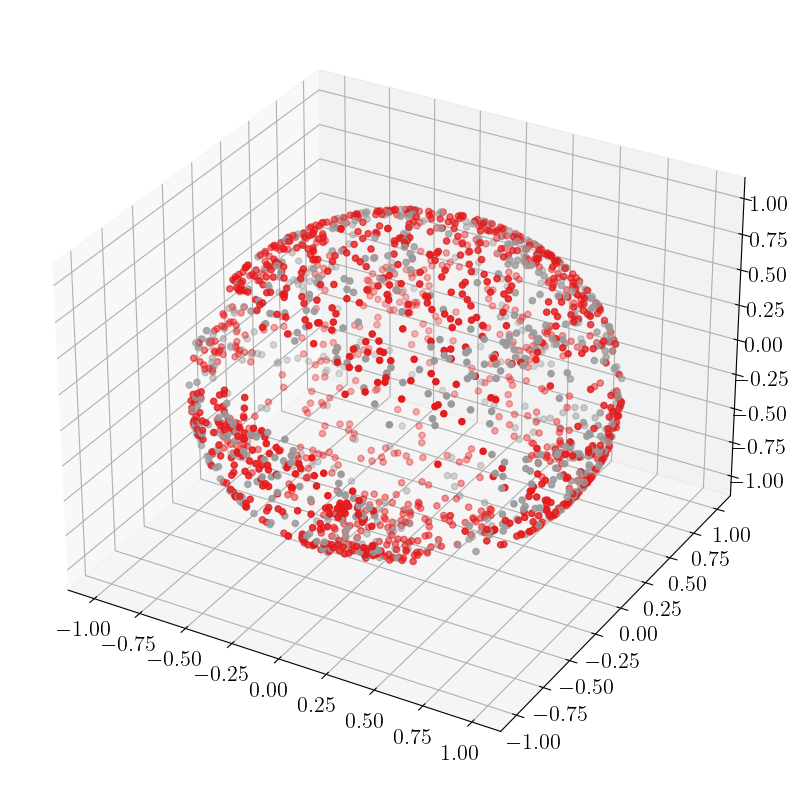

In [13]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xx, yy, zz, c=[colormap(i) for i in y])

In [14]:
vectors = np.concatenate((xx.reshape(-1, 1), yy.reshape(-1, 1), zz.reshape(-1, 1)), axis=1)

In [15]:
idx = data['new_id'].values
idx
# np.c_[idx, vectors]

array([1706, 1273,  313, ...,  769,  504, 1649])

In [16]:
vectors[:10]

array([[-0.17790556, -0.98195004, -0.06421611],
       [-0.11764719, -0.14328085, -0.9826646 ],
       [ 0.886498  ,  0.29817858, -0.35385147],
       [ 0.326677  ,  0.3717977 ,  0.86893535],
       [-0.4456007 ,  0.8827244 , -0.14912274],
       [ 0.7044081 , -0.02315152, -0.7094175 ],
       [ 0.13630185,  0.48298997, -0.8649523 ],
       [ 0.5882352 ,  0.5267102 , -0.6136413 ],
       [ 0.74465096, -0.54564154,  0.38440886],
       [-0.4484223 , -0.36106664,  0.81764805]], dtype=float32)

In [17]:
# F-Mercator

# with open("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/twitch/PTBR/umap/umap_twitch_PTBR_spherical_positions.txt", 'w') as f:
#     for i, v in zip(idx, vectors):
#         f.write(f'{i} {" ".join(map(str, v))}\n')

In [27]:
%%time

sphere_mapper = UMAP(metric='cosine', output_metric='haversine', random_state=3).fit(X)
xx = np.sin(sphere_mapper.embedding_[:, 0]) * np.cos(sphere_mapper.embedding_[:, 1])
yy = np.sin(sphere_mapper.embedding_[:, 0]) * np.sin(sphere_mapper.embedding_[:, 1])
zz = np.cos(sphere_mapper.embedding_[:, 0])
vectors2 = np.concatenate((xx.reshape(-1, 1), yy.reshape(-1, 1), zz.reshape(-1, 1)), axis=1)

CPU times: user 22.6 s, sys: 359 ms, total: 22.9 s
Wall time: 22.9 s


100%|██████████| 1912/1912 [02:35<00:00, 12.27it/s]


The best Z-axis rotation angle:  3.4621633325275267


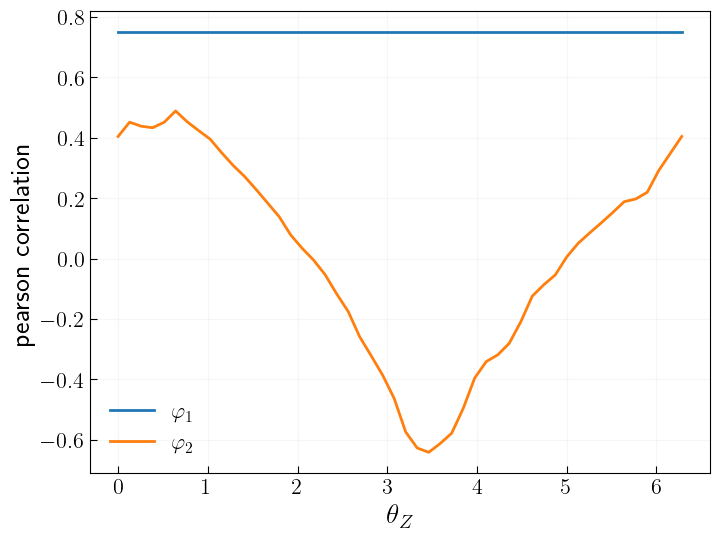

In [28]:
from lib.check_inferred_embeddings import *

real_coords_all, inf_coords_all, real_coords_spherical, inf_coords_spherical = \
    apply_pipeline_matrix_with_loading_and_rotate_all_euclidean_use_all_nodes(vectors, vectors2, )

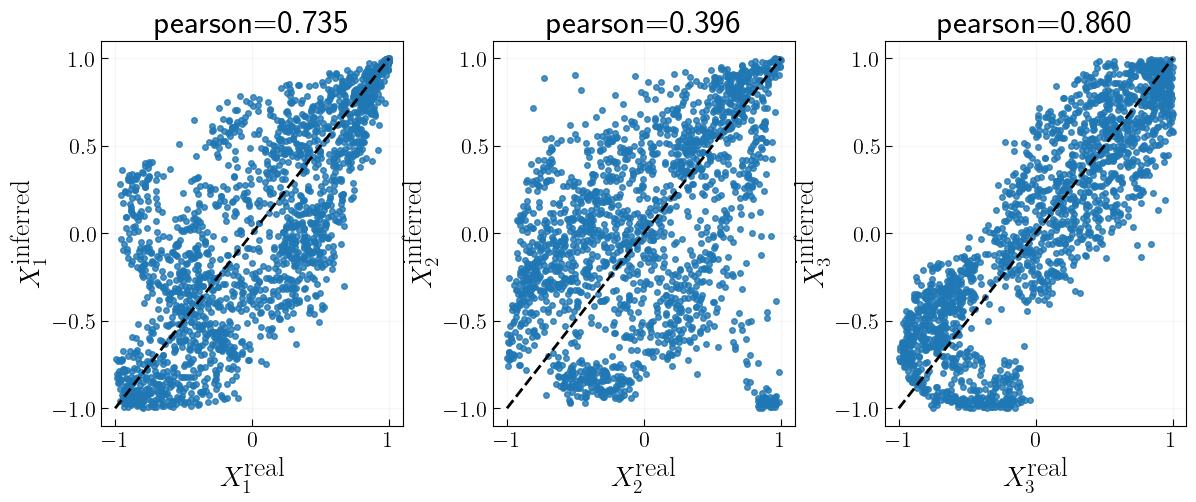

In [29]:
plot_euclidean_coordinates_comparison(inf_coords_all, real_coords_all)